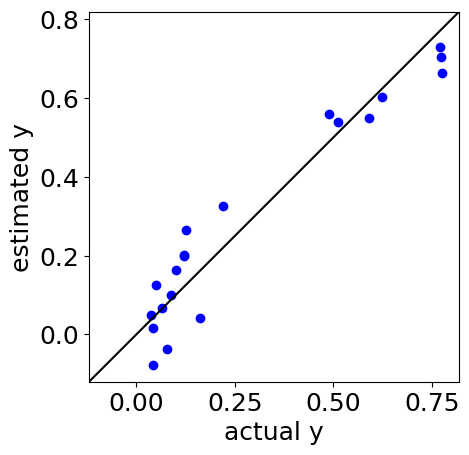

In [1]:
# -*- coding: utf-8 -*-
"""
@author: Hiromasa Kaneko
"""

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression  # OLS モデルの構築に使用

dataset = pd.read_csv('resin.csv', index_col=0, header=0)

# モデル構築 1. データセットの分割
y = dataset.iloc[:, 0]  # 目的変数
x = dataset.iloc[:, 1:]  # 説明変数

# モデル構築 2. 特徴量の標準化 (標準偏差が 0 の特徴量の削除)
deleting_variables = x.columns[x.std() == 0] 
x = x.drop(deleting_variables, axis=1)
autoscaled_y = (y - y.mean()) / y.std()
autoscaled_x = (x - x.mean()) / x.std()

# モデル構築 3. OLS による標準回帰係数の計算
model = LinearRegression()  # モデルの宣言
model.fit(autoscaled_x, autoscaled_y)  # モデルの構築

# 標準回帰係数
standard_regression_coefficients = pd.DataFrame(model.coef_)  # Pandas の DataFrame 型に変換
standard_regression_coefficients.index = x.columns  # X に対応する名前を、元のデータセットにおける X の名前に変更
standard_regression_coefficients.columns = ['standard_regression_coefficients']  # 列名を変更
standard_regression_coefficients.to_csv(
    'standard_regression_coefficients_ols.csv')  # csv ファイルに保存。同じ名前のファイルがあるときは上書きされますので注意してください

x_new = dataset.iloc[:, 1:]  # 今回はモデル構築に用いたデータセットと同じデータセットにおける Y の値を推定します

# 新しいデータの推定 1. モデル構築用のデータセットを用いた特徴量の標準化
autoscaled_x_new = (x_new - x.mean()) / x.std()

# 新しいデータの推定 2. Y の値の推定
autoscaled_estimated_y_new = model.predict(autoscaled_x_new)

# 新しいデータの推定 3. 推定値のスケールをもとに戻す
estimated_y_new = autoscaled_estimated_y_new * y.std() + y.mean()
estimated_y_new = pd.DataFrame(estimated_y_new, index=dataset.index, columns=['estimated_y'])
estimated_y_new.to_csv('estimated_y_ols.csv')

# 実測値 vs. 推定値のプロット
plt.rcParams['font.size'] = 18
plt.scatter(y, estimated_y_new.iloc[:, 0], c='blue')  # 実測値 vs. 推定値プロット
y_max = max(y.max(), estimated_y_new.iloc[:, 0].max())  # 実測値の最大値と、推定値の最大値の中で、より大きい値を取得
y_min = min(y.min(), estimated_y_new.iloc[:, 0].min())  # 実測値の最小値と、推定値の最小値の中で、より小さい値を取得
plt.plot([y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)],
         [y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min)], 'k-')  # 取得した最小値-5%から最大値+5%まで、対角線を作成
plt.ylim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min))  # y 軸の範囲の設定
plt.xlim(y_min - 0.05 * (y_max - y_min), y_max + 0.05 * (y_max - y_min))  # x 軸の範囲の設定
plt.xlabel('actual y')  # x 軸の名前
plt.ylabel('estimated y')  # y 軸の名前
plt.gca().set_aspect('equal', adjustable='box')  # 図の形を正方形に
plt.show()  # 以上の設定で描画
